# Guia da Camada de Enlace
### IMPORTANDO AS DEPENDÊNCIAS
##### O documento tem o objetivo de demostrar o funcionamento da camada de enlace, além de suas funções e ferramentas

In [1]:
from quantumnet.components import Network, Host
from quantumnet.objects import Qubit, Logger
Logger.activate(Logger)

##### Instanciando a rede, e setando a topologia.

2024-08-12 23:20:57,202: Qubit 0 adicionado à memória do Host 0.
2024-08-12 23:20:57,203: Qubit 0 criado com fidelidade inicial 0.8022618363780191 e adicionado à memória do Host 0.
2024-08-12 23:20:57,203: Qubit 1 adicionado à memória do Host 0.
2024-08-12 23:20:57,204: Qubit 1 criado com fidelidade inicial 0.17455942611872854 e adicionado à memória do Host 0.
2024-08-12 23:20:57,204: Qubit 2 adicionado à memória do Host 0.
2024-08-12 23:20:57,205: Qubit 2 criado com fidelidade inicial 0.7127730032625991 e adicionado à memória do Host 0.
2024-08-12 23:20:57,205: Qubit 3 adicionado à memória do Host 0.
2024-08-12 23:20:57,205: Qubit 3 criado com fidelidade inicial 0.6170790009614756 e adicionado à memória do Host 0.
2024-08-12 23:20:57,205: Qubit 4 adicionado à memória do Host 0.
2024-08-12 23:20:57,206: Qubit 4 criado com fidelidade inicial 0.8562566580389608 e adicionado à memória do Host 0.
2024-08-12 23:20:57,206: Qubit 5 adicionado à memória do Host 0.
2024-08-12 23:20:57,206: Qubi

Hosts inicializados
Canais inicializados
Pares EPRs adicionados


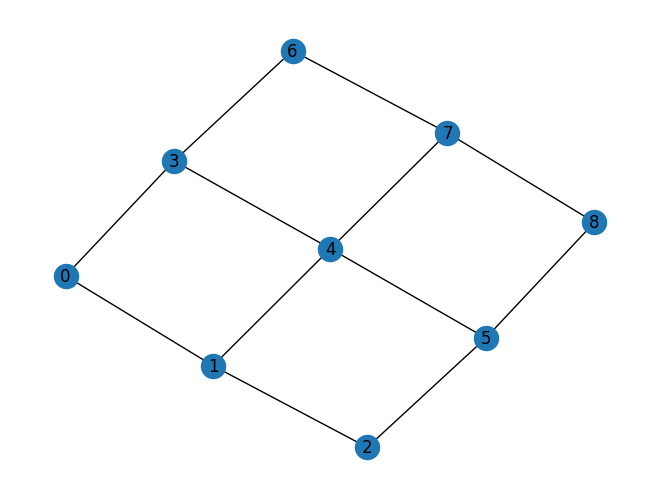

In [2]:
rede = Network()
rede.set_ready_topology("Grade", 3,3)
rede.draw()

##### Definindo os hosts alice e bob nos nós 1 e 2 respectivamente, e definindo os qubits que serão enviados

In [3]:
alice = rede.get_host(1)
bob = rede.get_host(2)
qubit1 = Qubit(1)
qubit2 = Qubit(2)


##### Enviando um request para o servidor, se a fidelidade dos qubits for maior que 0.5, o servidor aceita a conexão e envia a chave para o cliente, se não, é tentado novamente fazer o entrelaçamento, e se falhar novamente, o servidor tenta purificar.

In [4]:
rede.linklayer.request(1,2)

2024-08-12 23:20:57,835: A fidelidade entre o qubit Qubit 19 with state None e o qubit Qubit 29 with state None é 0.05335637758726765
2024-08-12 23:20:57,835: O protocolo de criação de emaranhamento foi bem sucedido, mas com fidelidade baixa.
2024-08-12 23:20:57,836: Entrelaçamento falhou entre 1 e 2 na tentativa 1.
2024-08-12 23:20:57,836: Não há EPRs suficientes para purificação no canal (1, 2).
2024-08-12 23:20:57,837: A fidelidade entre o qubit Qubit 18 with state None e o qubit Qubit 28 with state None é 0.6208437263898751
2024-08-12 23:20:57,837: O protocolo de criação de emaranhamento foi bem sucedido, mas com fidelidade baixa.
2024-08-12 23:20:57,837: Entrelaçamento falhou entre 1 e 2 na tentativa 2.
2024-08-12 23:20:57,838: Purificação falhou no canal (1, 2) devido a baixa probabilidade de sucesso da purificação.


False

##### Verificando o canal do canal

In [5]:
rede.get_eprs_from_edge(1,2)

##### Verificando todos os canais

In [6]:
rede.get_eprs()

{(0, 3): [<quantumnet.objects.epr.Epr at 0x19f326b4350>,
 (0, 1): [<quantumnet.objects.epr.Epr at 0x19f32263740>,
 (1, 4): [<quantumnet.objects.epr.Epr at 0x19f326d3980>,
 (1, 2): [<quantumnet.objects.epr.Epr at 0x19f326d2ae0>,
 (2, 5): [<quantumnet.objects.epr.Epr at 0x19f326b4800>,
 (3, 6): [<quantumnet.objects.epr.Epr at 0x19f326b5190>,
 (3, 4): [<quantumnet.objects.epr.Epr at 0x19f326b5790>,
 (4, 7): [<quantumnet.objects.epr.Epr at 0x19f3233be30>,
 (4, 5): [<quantumnet.objects.epr.Epr at 0x19f326b6270>,
 (5, 8): [<quantumnet.objects.epr.Epr at 0x19f326ee600>,
 (6, 7): [<quantumnet.objects.epr.Epr at 0x19f326b7020>,
 (7, 8): [<quantumnet.objects.epr.Epr at 0x19f326b7920>,
  <quantumnet.objects.epr.Epr at 0x19f326ef740>]}